In [15]:
from bs4 import BeautifulSoup as bsoup
import os
from urllib.request import urlopen
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import csv
import pandas as pd 
import re
import string
link="http://mlg.ucd.ie/modules/yalp/"

In [2]:
responsehosp = bsoup(urlopen(link+"health_medical_list.html").read().decode(),"html.parser")
responsebar = bsoup(urlopen(link+"bars_list.html").read().decode(),"html.parser")    
pindata=responsehosp.findAll("p")
pindatbar=responsebar.findAll("p")
linksinternal=[]
for p in pindata:
    liks=p.findAll("a")
    #print(liks)
    m = re.search('.+="(reviews_.+\.html)',str(liks))
    linksinternal.append([link+(m.group(1)),'h'])

for p in pindatbar:
    liks=p.findAll("a")
    #print(liks)
    m = re.search('.+="(reviews_.+\.html)',str(liks))
    linksinternal.append([link+(m.group(1)),'b'])


In [6]:
print(linksinternal)

[['http://mlg.ucd.ie/modules/yalp/reviews_tI0-USBAFWXpQ9Es6gpKXg.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_z30sgua7-gO8eMfWT-ViTQ.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_V_DXV9qg7QtG1r58aUJOrQ.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_z40G19e_XZh_XML0-W2mKw.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_VSM4SB7yRHzXqwPv9JApFw.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_wrte8YYJtPQK4zccENm_Gw.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_ZUZBA9EBWfML5aSJmH7yvw.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_p36XSjsfgvEYE_lZHU4nrg.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_4QV9lsViwEHmy07Vqv99ew.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_p9xhVRcI2jHgwPH-OYJvFQ.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_sQqn2UXb9NqDruKmmBhvuw.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_NNNZFhecyADXs1yCq9GPaA.html', 'h'], ['http://mlg.ucd.ie/modules/yalp/reviews_NVHuUK206x2E6KcJJX775g.html', 'h']

In [4]:
#print(response)
matrats=[]
textrats=[]
matratsbar=[]
textratsbar=[]
for liks2 in linksinternal:
    response = bsoup(urlopen(liks2[0]).read().decode(),"html.parser")
    pindata=response.findAll("p",{"class":["text","stars"]})
    
    for revs in pindata:
        rating=re.search('\<\D+"(.)',str(revs.findAll("img")))
        text=re.search('<p\sclass\=\"text\"\>(.+)\<\/p\>',str(revs))
        if rating:
            if(liks2[1]=='h'):
                matrats.append(0 if int(rating.group(1))>3 else 1)
            else:
                matratsbar.append(0 if int(rating.group(1))>3 else 1)
       # print(rating.group(1))
        if(text):
            if(liks2[1]=='h'):
                textrats.append(text.group(1))
            else:
                textratsbar.append(text.group(1))
                #print(text.group(1))
            
    #reviews.loc[len(reviews),:]=[matrats,textrats]
reviews = pd.DataFrame(  {'text': textrats,'ratings': matrats})
reviewsbar = pd.DataFrame(  {'text': textratsbar,'ratings': matratsbar})
print(reviews) 
print(reviewsbar)
#print(matrats)

                                                   text  ratings
0     I have so many good things to say about this p...        0
1     I found them to be highly skilled and an exper...        0
2     Where do I even begin? This office has been so...        0
3     I went in because I had toothache and needed a...        0
4     Found a new dental office. This place is amazi...        0
5     Dr. Carlos is always on top of things, I've ne...        0
6     Dr. Carlos and the staff were very friendly. T...        0
7     Love these guys! Had a chip in my tooth and no...        0
8     I just found this office in Scottsdale and the...        0
9     Dr. Mandap has been my dentist for many years ...        0
10    A bit of a drive on the freeways but this plac...        0
11    Wow. Do not order from here. I ordered an item...        1
12    I was searching google for diabetic shoes for ...        1
13    Am I reviewing the same company as everyone el...        0
14    This company is ter

In [24]:
def preprocess(reviews):
    for index, row in reviews.iterrows(): #loc[:2]
        tokens = word_tokenize(str(row["text"]).translate(str.maketrans('', '', string.punctuation)))
        #tokenizing the text
        print(tokens)
        lowercaselis = [w.lower() for w in tokens] #normalizing the tokens
        stop_words = set(stopwords.words('english'))
        processedtokens = [w for w in lowercaselis if not w in stop_words] #removing the stopwords'''
        print(processedtokens)
        prs=""
        for word in processedtokens:
            prs = word+' '+prs 
        reviews.at[index,'text']=prs
preprocess(reviews)
preprocess(reviewsbar)
print(reviews) 
print(reviewsbar)

['I', 'have', 'so', 'many', 'good', 'things', 'to', 'say', 'about', 'this', 'place', 'I', 'needed', 'a', 'cleaning', 'and', 'a', 'filling', 'so', 'I', 'decided', 'to', 'do', 'the', 'part', 'I', 'was', 'dreading', 'more', 'the', 'filling', 'But', 'Dr', 'Carlos', 'had', 'the', 'magic', 'touch', 'and', 'I', 'felt', 'no', 'pain', 'at', 'all', 'and', 'the', 'process', 'was', 'over', 'way', 'faster', 'than', 'I', 'thought', 'it', 'would', 'be', 'Next', 'I', 'came', 'in', 'for', 'my', 'cleaning', 'and', 'it', 'was', 'with', 'Dr', 'Mandap', 'She', 'was', 'very', 'friendly', 'and', 'after', 'my', 'cleaning', 'she', 'was', 'very', 'patient', 'and', 'took', 'the', 'time', 'to', 'answer', 'all', 'of', 'the', 'questions', 'I', 'had', 'about', 'my', 'teeth', 'gums', 'etc', 'and', 'gave', 'me', 'a', 'lot', 'of', 'good', 'tips', 'on', 'my', 'personal', 'dental', 'care', 'The', 'office', 'has', 'a', 'cool', 'futuristic', 'look', 'to', 'it', 'as', 'well', 'and', 'the', 'receptionist', 'is', 'always', 'a

['ok', 'dont', 'like', 'dentist', 'begin', 'chose', 'particular', 'dentist', 'based', 'reviews', 'location', 'job', 'home', 'doesnt', 'look', 'like', 'greatest', 'place', 'go', 'get', 'chops', 'maintained', 'dr', 'staff', 'make', 'hundred', 'times', 'dr', 'acosta', 'professional', 'atmosphere', 'casual', 'im', 'chart', 'number', 'carry', 'like', 'family', 'makes', 'want', 'laugh', 'im', 'getting', 'teeth', 'drilled', 'awesome', 'doesnt', 'like', 'burnt', 'popcorn', 'either']
['This', 'office', 'is', 'awesome', 'Everyone', 'is', 'caring', 'and', 'friendly', 'I', 'am', 'phobic', 'about', 'going', 'and', 'they', 'did', 'their', 'best', 'to', 'relieve', 'my', 'anxiety', 'Dr', 'Agosta', 'is', 'very', 'nice', 'super', 'professional', 'and', 'a', 'pleasure', 'to', 'deal', 'with', 'He', 'explains', 'all', 'your', 'options', 'gives', 'you', 'reasonable', 'prices', 'and', 'only', 'recommends', 'what', 'should', 'be', 'done', 'I', 'would', 'recommend', 'this', 'dental', 'office', 'to', 'anyone', 

['Lackluster', 'first', 'impressions', 'all', 'around', 'The', 'place', 'is', 'really', 'clean', 'and', 'looks', 'very', 'high', 'end', 'they', 'also', 'offer', 'a', 'lot', 'of', 'services', 'you', 'wouldnt', 'usually', 'have', 'at', 'a', 'normal', 'dermatologist', 'However', 'I', 'was', 'surprised', 'by', 'the', 'lack', 'of', 'professionalism', 'and', 'organization', 'from', 'the', 'front', 'desk', 'I', 'came', 'in', 'several', 'days', 'earlier', 'to', 'fill', 'out', 'the', 'initial', 'paperwork', 'and', 'there', 'was', 'one', 'really', 'hard', 'working', 'girl', 'who', 'was', 'overworked', 'because', 'her', 'fellow', 'frontdeskers', 'decided', 'to', 'take', 'an', 'extended', 'birthday', 'lunch', 'When', 'they', 'can', 'back', 'and', 'I', 'went', 'to', 'turn', 'in', 'my', 'forms', 'they', 'were', 'doing', 'nail', 'art', 'When', 'I', 'returned', 'the', 'day', 'of', 'the', 'appointment', 'they', 'asked', 'if', 'I', 'had', 'filled', 'out', 'the', 'initial', 'paperwork', 'assuming', 'they

['find', 'integrative', 'holistic', 'homeopathic', 'nutrition', 'based', 'natural', 'approach', 'combined', 'careful', 'state', 'art', 'technology', 'testing', 'extraordinary', 'skill', 'set', 'dr', 'carol', 'ann', 'chaney', 'impressive', 'dont', 'even', 'words', 'describe', 'trained', 'brilliant', 'doctors', 'country', 'amp', 'training', 'experience', 'amp', 'ability', 'problem', 'solve', 'superb', 'extremely', 'careful', 'assessments', 'dots', 'amp', 'crosses', 'ts', 'gives', 'answers', 'questions', 'likely', 'even', 'considered', 'followthru', 'excellent', 'health', 'improvements', 'recommendations', 'sensational', 'based', 'clinical', 'testing', 'holistic', 'md', 'valley', 'also', 'sensational', 'dr', 'carol', 'ann', 'chaney', 'made', 'incredible', 'headway', 'one', 'week', 'check', 'reviews', 'excellent', 'holistic', 'doctors', 'practitioners', 'las', 'vegas', 'amp', 'beyond', 'bonus', 'dr', 'chaney', 'lovely', 'genuine', 'caring', 'style', 'obvious', 'moment', 'start', 'first', '

['update', 'second', 'visit', 'upon', 'inspection', 'seems', 'although', 'advertise', 'healthy', 'generally', 'almost', 'meals', 'high', 'fat', 'content', 'since', 'dont', 'allow', 'create', 'anything', 'theres', 'much', 'fix', 'experience', 'employee', 'seemed', 'uninterested', 'last', 'second', 'gave', 'order', 'spoken', 'clipped', 'way', 'made', 'feel', 'like', 'didnt', 'care', 'wanted', 'get', 'dont', 'need', 'special', 'service', 'bit', 'offputting', 'asked', 'kale', 'instead', 'spinachromaine', 'paid', 'extra', 'said', 'kale', 'still', 'got', 'spinachromaine', 'got', 'takeout', 'didnt', 'notice', 'later', 'destination', 'asked', 'dressing', 'smothered', 'dressing', 'much', 'salad', 'soggy', 'time', 'got', 'eat', 'place', 'isnt', 'terrible', 'fine', 'customer', 'service', 'menu', 'versatility', 'seems', 'seriously', 'lacking', 'dropped', 'review', '3', '2', 'stars', 'combined', 'experiences', 'original', 'review', 'tried', 'place', 'post', 'workout', 'classes', 'wanted', 'healthie

['Electrolysis', 'is', 'no', 'longer', 'offered', 'here', 'even', 'though', 'its', 'listed', 'on', 'the', 'companys', 'website', 'Frustrating', 'to', 'research', 'it', 'find', 'a', 'place', 'that', 'looks', 'convenient', 'and', 'then', 'have', 'to', 'start', 'all', 'over']
['electrolysis', 'longer', 'offered', 'even', 'though', 'listed', 'companys', 'website', 'frustrating', 'research', 'find', 'place', 'looks', 'convenient', 'start']
['Best', 'eyebrow', 'waxing', 'I', 'have', 'ever', 'gotten', 'Ive', 'searched', 'high', 'and', 'low', 'for', 'a', 'great', 'place', 'to', 'get', 'my', 'eyebrows', 'done', 'Judys', 'is', 'by', 'far', 'the', 'best', 'and', 'most', 'welcoming', 'service', 'I', 'have', 'ever', 'received', 'An', 'eyebrow', 'waxing', 'only', 'costs', '15', 'which', 'is', 'right', 'about', 'on', 'par', 'with', 'many', 'of', 'the', 'nail', 'salons', 'that', 'offer', 'waxing', 'services', 'However', 'unlike', 'many', 'of', 'the', 'nail', 'salons', 'the', 'technicians', 'are', 'onl

['weve', 'new', 'patient', 'practice', 'since', 'last', 'december', 'couldnt', 'happier', 'great', 'facility', 'amp', 'location', 'great', 'staff', 'great', 'doctor', 'enjoy', 'patient', 'portal', 'easy', 'billing', 'easy', 'appointment', 'scheduling', 'easy', 'way', 'connecting', 'staff', 'need', 'great', 'job', 'modern', 'family', 'medicine']
['I', 'made', 'an', 'appointment', 'because', 'they', 'were', 'near', 'my', 'place', 'and', 'I', 'liked', 'the', 'fact', 'that', 'they', 'seemed', 'to', 'take', 'a', 'natural', 'holistic', 'approach', 'Upon', 'calling', 'I', 'notified', 'them', 'I', 'was', 'self', 'pay', 'No', 'insurance', 'The', 'payment', 'process', 'was', 'explained', 'I', 'thought', 'strange', 'that', 'they', 'wouldnt', 'take', 'cash', 'but', 'no', 'problem', 'The', 'place', 'is', 'hard', 'to', 'find', 'and', 'parking', 'is', 'very', 'bad', 'Good', 'thing', 'I', 'wasnt', 'really', 'sick', 'Cause', 'you', 'have', 'to', 'park', 'in', 'the', 'back', 'alley', 'and', 'walk', 'aro

['ok', 'wish', 'could', 'give', '99', 'one', 'perfect', 'rainsprings', 'pretty', 'close', 'cleaning', 'heidi', 'awesome', 'dr', 'bringhurst', 'dentist', 'needed', 'lot', 'fixing', 'cleaning', 'long', 'time', 'since', 'dentist', 'much', 'hate', 'dentist', 'every', 'one', 'rainsprings', 'made', 'bearable', 'thank', 'yelp', 'helping', 'find']
['This', 'review', 'is', 'for', 'my', 'recent', 'cleaning', 'visit', 'I', 'will', 'review', 'the', 'oral', 'surgeon', 'services', 'next', 'week', 'once', 'I', 'have', 'had', 'my', 'wisdom', 'teeth', 'out', 'I', 'had', 'the', 'unfortunate', 'need', 'for', 'a', 'deep', 'cleaning', 'since', 'it', 'had', 'been', '4', 'years', 'since', 'my', 'last', 'dental', 'visit', 'But', 'honestly', 'Heidi', 'made', 'the', 'experience', 'so', 'amazing', 'that', 'I', 'would', 'not', 'mind', 'having', 'to', 'go', 'through', 'it', 'all', 'again', 'I', 'am', 'terrified', 'of', 'the', 'dentist', 'its', 'funny', 'but', 'the', 'worst', 'part', 'for', 'me', 'would', 'have', '

['read', 'reviews', 'getting', 'appt', 'dr', 'nasri', 'unfortunately', 'staff', 'front', 'desk', 'unprofessional', 'rude', 'cant', 'believe', 'scheduled', 'february', '27', '415', 'call', 'confirm', 'appt', 'day', 'earlier', 'lady', 'front', 'desk', 'confirmed', 'appt', '415', 'tenaya', 'clinic', 'arrived', 'appt', 'told', 'appointment', 'tried', 'explain', 'lady', 'even', 'confirmed', 'day', 'earlier', 'kept', 'saying', 'never', 'made', 'appointment', 'still', 'cant', 'believe']
['Dr', 'Sina', 'Nasri', 'is', 'the', 'best', 'doctor', 'Ive', 'ever', 'met', 'Ive', 'been', 'struggling', 'with', 'sinus', 'issues', 'long', 'time', 'ago', 'and', 'thank', 'God', 'I', 'met', 'him', 'He', 'did', 'sinoplasty', 'and', 'today', 'is', '3rd', 'day', 'of', 'my', 'surgery', 'and', 'I', 'already', 'feel', 'great', 'He', 'is', 'a', 'rock', 'star', 'very', 'professional', 'patient', 'and', 'understanding', 'Bless', 'your', 'hands', 'doctor', 'and', 'I', 'will', 'definately', 'recommend', 'all', 'my', 'fa

['great', 'selection', 'best', 'produce', 'town', 'dairy', 'little', 'expensive', 'outrageously', 'overpricd', 'delicious', 'everything', 'cut', 'organic', 'produce', 'reasonable', 'considering', 'premium', 'organic', 'staff', 'knows', 'exactly', 'selling', 'great', 'variety', 'vitamins', 'hippie', 'stuff', 'latest', 'delicious', 'foods', 'one', 'star', 'deduction', 'neighborhood', 'super', 'sketchy']
['I', 'had', 'a', 'much', 'better', 'experience', 'when', 'this', 'place', 'was', 'Sunflower', 'Market', 'Now', 'that', 'its', 'Sprouts', 'I', 'feel', 'completely', 'unwelcome', 'here', 'Not', 'one', 'person', 'greets', 'you', 'Not', 'one', 'Not', 'one', 'person', 'asks', 'you', 'if', 'you', 'need', 'any', 'help', 'Not', 'one', 'And', 'to', 'top', 'it', 'off', 'today', 'I', 'got', 'the', 'worst', 'attitude', 'from', 'two', 'of', 'their', 'cashiers', 'the', 'short', 'white', 'middleaged', 'woman', 'who', 'appeared', 'a', 'bit', 'rough', 'around', 'the', 'edges', 'and', 'the', 'young', 'ski

['couldnt', 'hoped', 'better', 'experience', '2nd', 'time', 'kids', 'gone', 'entire', 'experience', 'absolutely', 'wonderful', 'thankful', 'found', 'place', '5', 'stars', 'certainly', 'recommend', 'others']
['Wowwwww', 'what', 'an', 'awesome', 'dental', 'office', 'for', 'kids', 'I', 'booked', 'my', 'daughters', 'first', 'dentist', 'appointment', 'here', 'because', 'of', 'the', 'amazing', 'reviews', 'and', 'when', 'we', 'opened', 'the', 'door', 'my', 'daughter', 'smiled', 'and', 'laughed', 'because', 'she', 'thought', 'it', 'was', 'a', 'playground', 'The', 'decor', 'with', 'the', 'wood', 'floors', 'and', 'little', 'play', 'area', 'with', 'grass', 'books', 'and', 'toys', 'is', 'every', 'babytoddlers', 'wonderland', 'All', 'my', 'daughter', 'wanted', 'to', 'do', 'was', 'play', 'and', 'crawl', 'but', 'we', 'were', 'called', 'back', 'to', 'one', 'of', 'the', 'dental', 'chair', 'rooms', 'to', 'answer', 'a', 'few', 'questions', 'All', 'the', 'employees', 'were', 'so', 'sweet', 'and', 'the', '

['work', 'clinic', 'tried', 'patients', 'records', 'sent', 'upmc', 'almost', 'month', 'staff', 'upmc', 'still', 'sent', 'records', 'even', 'four', 'faxed', 'requests', 'phone', 'calls', 'transposed', 'patients', 'name', 'first', 'denied', 'patients', 'signature', 'actually', 'refusing', 'send', 'records', 'university', 'pittsburgh', 'medical', 'center', 'must', 'written', 'cover', 'sheet', 'rather', 'abbreviation', 'name', 'incompetent', 'come', 'nothing', 'excuses', 'release', 'patients', 'records', 'glad', 'never']
['Horrible', 'Hospital', 'that', 'doesnt', 'use', 'local', 'contractors', 'to', 'build', 'their', 'facilities', 'Shame', 'on', 'UPMC', 'Would', 'never', 'go', 'where', 'the', 'building', 'is', 'built', 'but', 'people', 'who', 'dont', 'even', 'get', 'health', 'insurance', 'How', 'dare', 'they', 'take', 'tax', 'payer', 'dollars', 'and', 'use', 'out', 'of', 'town', 'cheap', 'labor']
['horrible', 'hospital', 'doesnt', 'use', 'local', 'contractors', 'build', 'facilities', 'sham

['This', 'place', 'simply', 'doesnt', 'cut', 'it', 'The', 'food', 'is', 'substandard', 'and', 'the', 'service', 'is', 'a', 'bunch', 'of', 'folks', 'running', 'around', 'like', 'they', 'have', 'no', 'idea', 'what', 'they', 'are', 'doing', 'Go', 'someplace', 'else', 'any', 'place', 'else', 'This', 'truly', 'is', 'not', 'good', 'food']
['place', 'simply', 'doesnt', 'cut', 'food', 'substandard', 'service', 'bunch', 'folks', 'running', 'around', 'like', 'idea', 'go', 'someplace', 'else', 'place', 'else', 'truly', 'good', 'food']
['Crapplebees', 'is', 'right', 'I', 'joined', 'a', 'colleague', 'here', 'for', 'a', 'quick', 'lunch', 'and', 'Ill', 'likely', 'not', 'make', 'that', 'mistake', 'twice', 'The', 'service', 'was', 'minimal', 'the', 'restaurant', 'was', 'dirty', 'and', 'the', 'food', 'was', 'horrible', 'My', 'salad', 'was', 'filled', 'with', 'wilted', 'lettuce', 'and', 'my', 'water', 'tasted', 'funny', 'I', 'could', 'have', 'gotten', 'a', 'better', 'salad', 'from', 'McDonalds', 'at', 'h

['This', 'place', 'had', 'potential', 'Who', 'doesnt', 'like', 'burgers', 'especially', 'build', 'your', 'own', 'burgers', 'So', 'I', 'start', 'this', 'place', 'at', 'a', 'full', 'five', 'stars', 'But', 'it', 'fell', 'flat', 'for', 'me', 'First', 'of', 'all', 'this', 'place', 'is', 'literally', 'in', 'like', 'the', 'middle', 'of', 'nowhere', '3540', 'minutes', 'from', 'Chandler', 'without', 'traffic', 'So', 'that', 'was', 'lame', 'But', 'anyways', 'I', 'ordered', 'a', 'BuildMyOwn', 'burger', 'and', 'asked', 'for', 'it', 'medium', 'and', 'it', 'was', 'cooked', 'well', 'done', 'and', 'wasnt', 'juicy', 'at', 'all', 'Which', 'sucks', 'cuz', 'I', 'want', 'meat', 'Nice', 'juicy', 'man', 'meat', 'Not', 'hard', 'charred', 'burnt', 'meat', 'But', 'I', 'digress', 'I', 'had', 'a', 'burned', 'up', 'piece', 'of', 'meat', 'with', 'some', 'nice', 'mushrooms', 'and', 'onions', 'but', 'due', 'to', 'the', 'burned', 'meat', 'and', 'the', 'overall', 'lacklusterness', 'of', 'the', 'burger', 'I', 'shall', '

['best', 'pinball', 'anywhere', 'fantastic', 'place', 'best', 'collection', 'pins', 'seen', 'anywhere', 'excellent', 'shape', 'check', 'recent', 'selection', 'pins', 'twilight', 'zone', 'attack', 'mars', 'funhouse', 'new', 'star', 'wars', 'new', 'batman', 'replaced', 'lord', 'rings', 'others', 'didnt', 'time', 'play', 'owner', 'great', 'hostess', 'loves', 'pinball', 'recommend', 'place', 'enough']
['Best', 'place', 'to', 'play', 'pinball', 'in', 'Toronto', 'Had', 'a', 'blast', 'here', 'and', 'luckily', 'got', 'to', 'play', 'with', 'the', 'folks', 'that', 'run', 'both', 'the', 'place', 'itself', 'and', 'the', 'machines', 'Well', 'maintained', 'pinball', 'with', 'a', 'nice', 'mix', 'of', 'eras', 'too', 'Definitely', 'wan', 'na', 'come', 'back', 'to', 'check', 'it', 'out', 'again', 'the', 'next', 'time', 'Im', 'in', 'the', '416']
['best', 'place', 'play', 'pinball', 'toronto', 'blast', 'luckily', 'got', 'play', 'folks', 'run', 'place', 'machines', 'well', 'maintained', 'pinball', 'nice', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['dinner', 'dec', '7', 'service', 'incredible', 'atmosphere', 'kinda', 'place', 'except', 'steelers', 'stuff', 'hey', 'pittsburgh', 'got', '2', 'best', 'seller', '1', 'best', 'seller', 'ask', 'beer', 'sandwich', 'monster', '799', 'reasonably', 'priced', 'entree', 'heard', 'tell', 'pittsburgians', 'drink', 'eat', 'two', 'things', 'salute', 'cuz', 'fat', 'arse', 'couldnt', 'finish', '1', 'compliantcomment', '2', 'needed', 'sauce', 'sort', 'maybe', 'ketchupmayo', 'next', 'time', 'got', 'retro', 'tots', 'loved', 'loved', 'house', 'made', 'dipping', 'sauce', 'even', 'upon', 'discussion', 'learned', 'primanti', 'insiders', 'put', 'retro', 'tot', 'sauce', 'sandwiches', 'great', 'idea', 'wings', 'small', 'priced', 'accordingly', 'sauces', 'way', 'average']
['Maybe', 'it', 'was', 'the', 'san', 'which', 'that', 'i', 'ordered', 'it', 'just', 'was', 'not', 'good', 'at', 'all', 'I', 'ordered', 'their', 'pitt', 'sandwich', 'and', 'i', 'was', 'disappointed', 'The', 'patty', 'used', 'was', 'dry', 'and

['according', 'quick', 'web', 'search', 'ive', 'learned', 'scullery', 'secondary', 'room', 'used', 'several', 'things', 'used', 'washing', 'cleaning', 'even', 'overflow', 'kitchen', 'apart', 'traditional', 'use', 'never', 'saw', 'bar', 'description', 'scullery', 'perhaps', 'thats', 'saw', 'couple', 'try', 'bring', 'baby', 'dont', 'know', 'scullery', 'definitely', 'bar', 'babies', 'definitely', 'arent', 'allowed', 'plan', 'come', 'dont', 'bring', 'kids', 'youll', 'kicked', 'upset', 'screaming', 'youll', 'never', 'return', 'walk', 'yes', 'actually', 'happened', 'common', 'sense', 'heres', 'find', 'scullery', 'inside', 'ogden', 'located', 'far', 'east', 'side', 'building', 'right', 'corner', '6th', 'ogden', 'walk', 'youll', 'see', 'small', 'bar', 'limited', 'seating', 'right', 'small', 'tables', 'additional', 'seating', 'left', 'walk', 'hallway', 'youll', 'find', 'three', '6seat', 'private', 'booths', 'bathrooms', 'oddly', 'placed', 'right', 'next', 'hidden', 'way', 'back', '100', 'seat',

['plain', 'fun', 'ms', 'pacman', 'got', 'giant', 'jenga', 'got', 'skee', 'ball', 'got', 'bragging', 'rights', 'tickets', 'pop', 'good', 'beer', 'sleection', 'check', 'beer', 'pong', 'table', 'yep', 'nice', 'patio', 'fun', 'bar', 'noda', 'look', 'forward', 'heading', 'back']
['This', 'is', 'a', 'fun', 'divebar', 'There', 'are', 'plenty', 'of', 'games', 'to', 'play', 'inside', 'and', 'outdoors', 'an', 'ATM', 'if', 'you', 'need', 'cashand', 'a', 'jukebox', 'to', 'play', 'music', 'They', 'have', 'drink', 'specials', 'that', 'are', 'pretty', 'good', 'but', 'in', 'general', 'their', 'prices', 'are', 'relatively', 'low', 'to', 'start', 'with', 'Its', 'a', 'big', 'space', 'however', 'itll', 'fill', 'up', 'on', 'the', 'weekendthis', 'is', 'one', 'of', 'the', 'hot', 'spots', 'in', 'NoDa', 'worth', 'checking', 'out']
['fun', 'divebar', 'plenty', 'games', 'play', 'inside', 'outdoors', 'atm', 'need', 'cashand', 'jukebox', 'play', 'music', 'drink', 'specials', 'pretty', 'good', 'general', 'prices', 

['went', 'lunch', 'today', 'heatseekers', 'dream', 'curry', 'noodle', 'bowl', 'say', 'wow', 'great', 'flavor', 'curry', 'soup', 'every', 'ingredient', 'sang', 'pickled', 'onions', 'crispy', 'fried', 'noodles', 'spicy', 'sweat', 'rolling', 'big', 'rosy', 'cheeks', 'pledge', 'allegiance', 'thai', 'coconut', 'curry', 'noodle', 'bowl', 'got', 'food', 'win', 'paired', 'texas', 'speed', 'bump', 'ipa', 'twas', 'solid', 'brew', 'undertaking']
['ALL', 'THE', 'GREAT', 'DANES', 'ARE', 'GARBAGEive', 'been', 'to', 'all', 'of', 'them', 'and', 'the', 'food', 'was', 'absolutely', 'horrible', 'and', 'mixed', 'drinks', 'taste', 'like', 'puke', 'They', 'always', 'manage', 'to', 'have', 'the', 'worst', 'customer', 'service', 'and', 'always', 'overcookundercook', 'my', 'foodjunk', 'junk', 'junk']
['great', 'danes', 'garbageive', 'food', 'absolutely', 'horrible', 'mixed', 'drinks', 'taste', 'like', 'puke', 'always', 'manage', 'worst', 'customer', 'service', 'always', 'overcookundercook', 'foodjunk', 'junk',

['sure', 'hoopla', 'place', 'place', 'less', '15', 'martinis', 'menu', 'advertise', 'theyre', 'martini', 'bar', '9', 'martinis', 'werent', 'filled', 'rim', 'lacked', 'garnish', 'great', 'outside', 'patio', 'area', 'eatingdrinking', 'watched', 'waitress', 'clearing', 'tables', 'outside', 'tossing', 'left', 'glasses', 'water', 'towards', 'plants', 'steps', 'away', 'another', 'table', 'prople', 'plastic', 'cheap', 'menus', 'hostess', 'didnt', 'say', 'goodbye', 'impressed']
['Wow', 'Went', 'here', 'last', 'weekend', 'at', 'the', 'suggestion', 'of', 'a', 'friend', 'She', 'ordered', 'a', 'chocolate', 'martini', 'while', 'I', 'had', 'one', 'of', 'the', 'seasonal', 'drinks', 'that', 'I', 'just', 'cant', 'recall', 'the', 'name', 'of', 'It', 'had', 'strawberry', 'puree', 'cucumber', 'vodka', 'and', 'was', 'so', 'refreshing', 'Both', 'drinks', 'were', 'delicious', 'in', 'fact', 'Ive', 'heard', 'many', 'good', 'things', 'about', 'their', 'pomegranate', 'martini', 'as', 'well', 'so', 'thats', 'next

text       It would help if the front girl don't just sit...
ratings                                                    1
Name: 0, dtype: object
0.6351724137931034


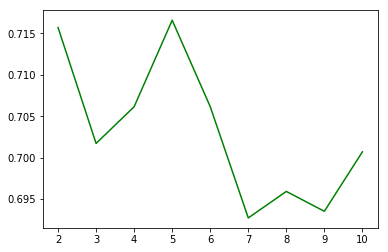

In [43]:
print(reviewsbar.loc[0])

averageacc=[]
def modelcomp(reviews,reviews2):
    sum=0
    for k in range(2,11):
        indl=int(len(reviews.index)/k)
        for i in range(0,k):
            if(i+1)*indl>len(reviews.index):
                continue
            if(i==0):
                reviewtest=pd.DataFrame(reviews.loc[(i+1)*indl+1:])
            else:
                if(i+1==k):
                    reviewtest=pd.DataFrame(reviews.loc[0:i*indl])
                else:
                    reviewtest=pd.DataFrame(reviews.loc[0:i*indl].append((reviews.loc[(i+1)*indl+1:])))
            reviewtrain=pd.DataFrame(reviews.loc[i*indl:(i+1)*indl]) 
            vectorizer = TfidfVectorizer() #using the TFIDF vectorizer for vectorizing the textual data
            train_vectors = vectorizer.fit_transform(reviewtrain.text)
            #print(reviewtest)
            test_vectors = vectorizer.transform(reviewtest.text)
            #print(train_vectors.shape, test_vectors.shape)
            model = KNeighborsClassifier(n_neighbors=15)#linear_model.LogisticRegression()#MultinomialNB() 
            model.fit(train_vectors,reviewtrain.ratings)
            predicted = model.predict(test_vectors)
            #print(accuracy_score(reviewtest.ratings,predicted))
            sum+=accuracy_score(reviewtest.ratings,predicted)
            #print(k,"  ",i)
        averageacc.append(sum/k)
        sum=0
    folds=[2,3,4,5,6,7,8,9,10]
    plt.plot(folds,averageacc,color='g')
    model = KNeighborsClassifier(n_neighbors=15)#linear_model.LogisticRegression()#MultinomialNB() 
    model.fit(vectorizer.fit_transform(reviews.text),reviews.ratings)
    predicted = model.predict( vectorizer.transform(reviews2.text))
    print(accuracy_score(reviews2.ratings,predicted))
    
#modelcomp(reviews,reviewsbar) 
modelcomp(reviewsbar,reviews)

In [ ]:
print(reviews.loc[:400].append(reviews.loc[760:]))

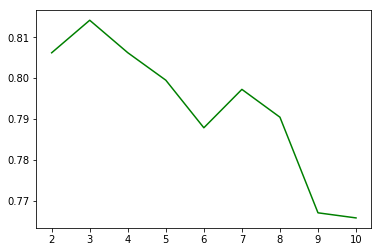